<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/01.%20week%201/Task/Machine%20Learning%20Week%201_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 14.2 MB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import mglearn

In [24]:
url = "https://raw.githubusercontent.com/KrituneX/Machine-Learning/refs/heads/main/01.%20week%201/dataset/HeartDisease.csv"
df = pd.read_csv(url)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [25]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [26]:
df.isnull().sum()
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

Total missing values: 6


In [27]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [28]:
df_check = df.isnull().sum()
print(df_check)
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Total missing values: 0


In [29]:
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Accuracy: 0.6
Precision: 0.551608187134503
Recall: 0.6
F1-score: 0.5655987394957982
AUC: 0.8185371190959307
Confusion Matrix:
[[30  1  0  0  1]
 [ 6  3  2  0  0]
 [ 2  1  0  4  0]
 [ 0  0  3  3  1]
 [ 0  1  0  2  0]]


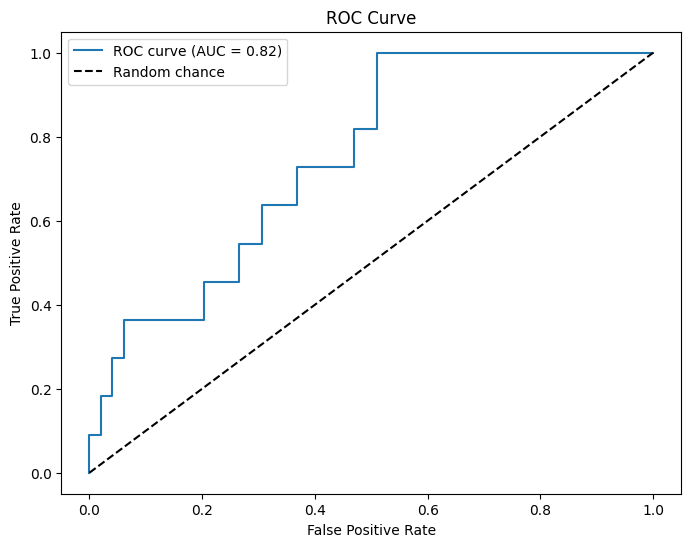

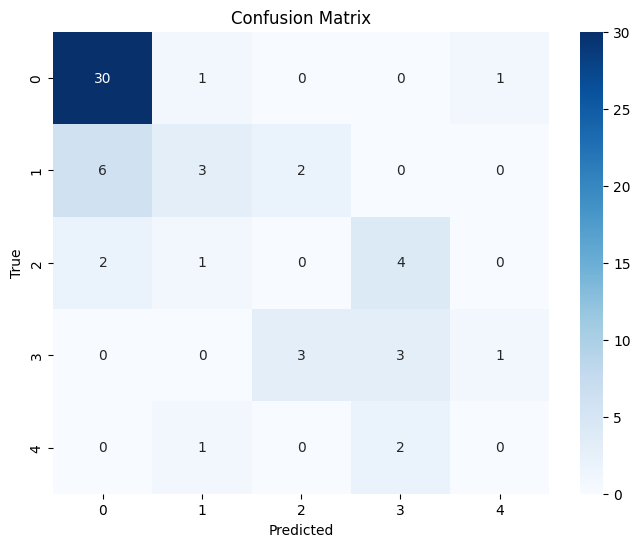

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [32]:
from IPython.display import display, Math

display(Math(r"\textbf{1. Accuracy (Akurasi)}"))
display(Math(r"Accuracy = \frac{TP + TN}{TP + TN + FP + FN}"))
display(Math(r"\text{Akurasi mengukur proporsi prediksi yang benar dibandingkan dengan total prediksi.}"))

display(Math(r"\textbf{2. Precision (Presisi)}"))
display(Math(r"Precision = \frac{TP}{TP + FP}"))
display(Math(r"\text{Presisi menunjukkan seberapa banyak prediksi positif yang benar dibandingkan dengan semua yang diprediksi positif.}"))

display(Math(r"\textbf{3. Recall (Sensitivitas)}"))
display(Math(r"Recall = \frac{TP}{TP + FN}"))
display(Math(r"\text{Recall mengukur seberapa banyak kasus positif yang berhasil dideteksi oleh model.}"))

display(Math(r"\textbf{4. F1-Score}"))
display(Math(r"F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}"))
display(Math(r"\text{F1-Score adalah rata-rata harmonik antara presisi dan recall, berguna saat ada ketidakseimbangan kelas.}"))

display(Math(r"\textbf{5. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)}"))
display(Math(r"AUC = \int_{0}^{1} TPR \, d(FPR)"))
display(Math(r"\text{ROC-AUC menunjukkan seberapa baik model dapat membedakan antara kelas positif dan negatif.}"))

display(Math(r"\textbf{6. False Positive Rate (FPR) dan True Positive Rate (TPR)}"))
display(Math(r"FPR = \frac{FP}{FP + TN}, \quad TPR = \frac{TP}{TP + FN}"))
display(Math(r"\text{ROC Curve dibuat dengan memplot TPR vs. FPR pada berbagai threshold.}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>